In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [65]:
def saveimage(name, filename):

    #Load data
    a = np.loadtxt('./static/data/{}.txt.gz'.format(filename), delimiter=',')

    #Calculate plot range
    data = np.sqrt(np.sum(np.square(a[:,1:4]), axis=1))
    max_g_ind = np.argmax(data)

    scale = 1000
    begin = max_g_ind-int((scale/2))
    end = max_g_ind+int((scale/2))
    if begin < 0:
        begin = 0
    if end >= len(data):
        end = len(data)-1


    #Setup plot
    fig = plt.figure(figsize=(12,6))
    
    plt.plot(a[begin:end,0]-a[max_g_ind,0], np.zeros(end-begin)+1, '-k', alpha=0.15)
    plt.plot([0,0], [0,data[max_g_ind]*1.1], '-k', alpha=0.15)
    plt.plot(a[begin:end,0]-a[max_g_ind,0], data[begin:end], '-r')
#     plt.plot(a[begin:end,0]-a[max_g_ind,0], data[begin:end], '.', alpha=1)


    #Add labels and legends and such
    plt.text(0.15, data[max_g_ind]*0.9, 'Max g: {:.2f}'.format(data[max_g_ind]), fontsize=20, color='g')
    plt.title('Experiment: ' + name)
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (g)')
    plt.ylim([0, data[max_g_ind]*1.05])
    plt.xlim(a[begin,0]-a[max_g_ind,0], a[end,0]-a[max_g_ind,0])
    # plt.legend([],[],['Acceleration (g)'])
    plt.savefig('./static/data/{}.png'.format(filename), dpi=150, bbox_inches='tight')
#     plt.show()

In [3]:
# data_out = shape_data('./static/data/2020_01_19-18_40_17_Packing_peanuts_trial_4.txt.gz')

def shape_data(filename):
    #Load data
#     a = np.loadtxt('./static/data/{}.txt.gz'.format(filename), delimiter=',')
    a = np.loadtxt(filename, delimiter=',')

    #Calculate plot range
    data = np.sqrt(np.sum(np.square(a[:,1:4]), axis=1))
    max_g_ind = np.argmax(data)

    scale = 600
    begin = max_g_ind-int((scale/2))
    end = max_g_ind+int((scale/2))
    if begin < 0:
        begin = 0
    if end >= len(data):
        end = len(data)-1
        
    data_out = [a[begin:end,0]-a[max_g_ind,0], data[begin:end]]
    return data_out

In [4]:
# all_data = gather_all_data(directory='./static/data', test='Air')

def gather_all_data(directory, test):
    data_list = []
    file_list = os.listdir(directory)
    for file in file_list:
        if (test in file) and ('txt.gz' in file[-6:]):
            data_out = shape_data(directory + '/' + file)
            data_list.append(data_out)
    print('Found {} items with name {}'.format(len(data_list), test))
    return data_list

In [40]:
# Show line plot and boxplot

def make_plot(test, all_data):
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    scale = 10
    gs = fig.add_gridspec(1, scale)
    ax1 = fig.add_subplot(gs[0:scale-1])
    ax2 = fig.add_subplot(gs[-1])

    max_g = []

    for data in all_data:
        ax1.plot(data[0], data[1], '-b', alpha=0.25)
        max_g.append(max(data[1]))


#     ax1.set_ylim([0, max(max_g)*1.05])
    ax1.set_ylim([0, 25])
    ax1.set_xlim([-0.3, 0.3])
    g_mean = np.mean(max_g)
    ax1.text(0.05, g_mean, 'Average Max g: {:.2f}'.format(g_mean), fontsize=20, color='g')

    # basic plot
    ax2.boxplot(max_g)
    ax2.set_title('Max g')
#     ax2.set_ylim([0, max(max_g)*1.05])
    ax2.set_ylim([0, 25])
    ax2.set_yticks([])
    ax2.set_xticks([])

    ax1.set_title('Experiment Results for {} {} times'.format(test, len(max_g)))

    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Acceleration (g)')
    # fig.suptitle('Aligning x-axis using sharex')
    plt.show()

Found 10 items with name Air_bags_trial


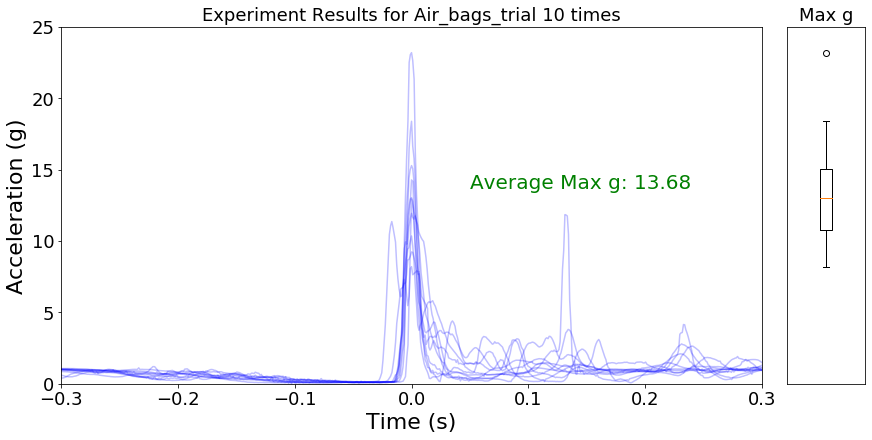

In [138]:
test = 'Air_bags_trial'
all_data = gather_all_data(directory='./static/data', test=test)
make_plot(test, all_data)

Found 10 items with name Packing_peanuts_trial


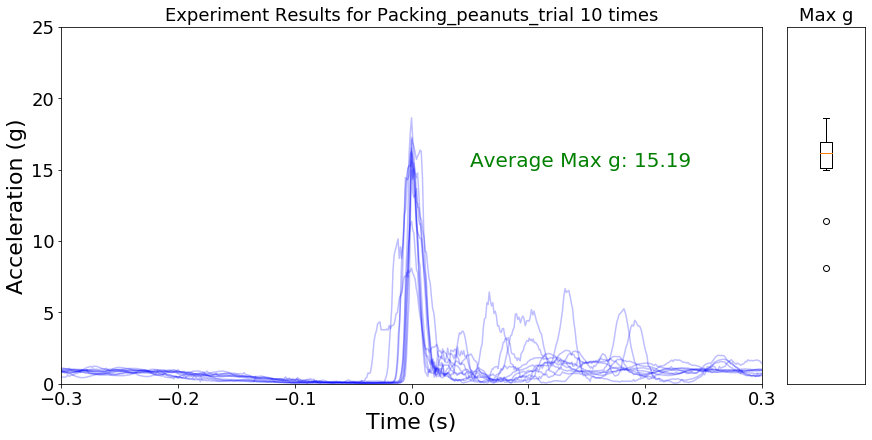

In [139]:
test = 'Packing_peanuts_trial'
all_data = gather_all_data(directory='./static/data', test=test)
make_plot(test, all_data)

Found 10 items with name Paper_trial


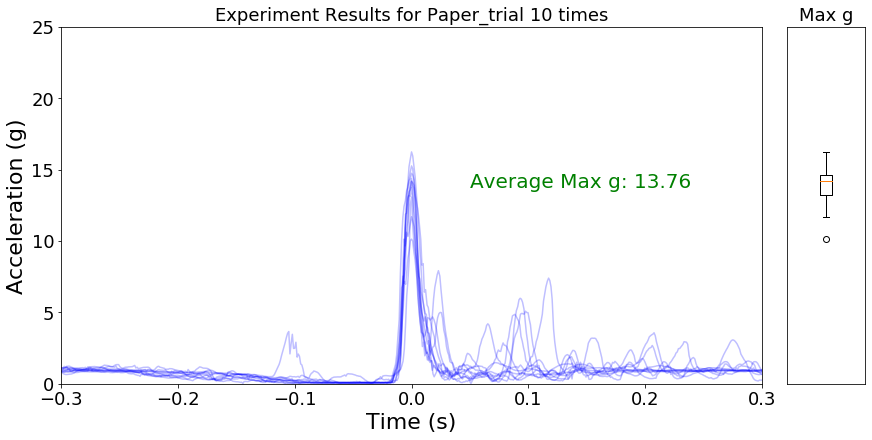

In [140]:
test = 'Paper_trial'
all_data = gather_all_data(directory='./static/data', test=test)
make_plot(test, all_data)

Found 10 items with name Bubble_wrap_trial


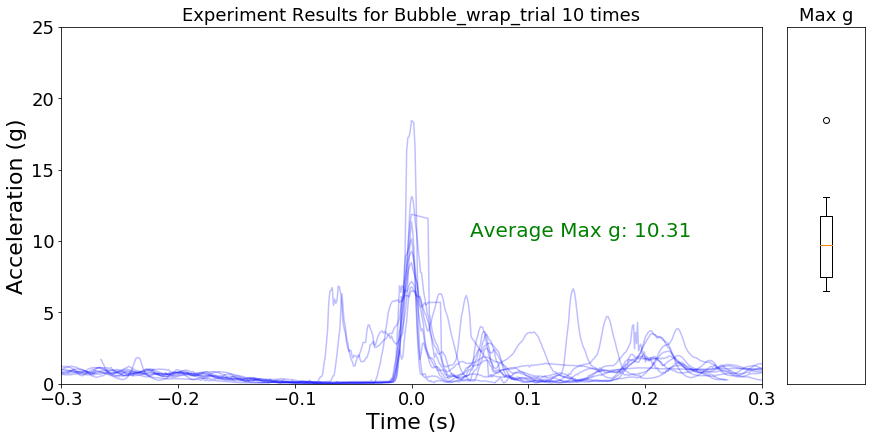

In [141]:
test = 'Bubble_wrap_trial'
all_data = gather_all_data(directory='./static/data', test=test)
make_plot(test, all_data)

In [61]:
# Pull out all the max G values

agg_data = []
tests = ['Bubble_wrap_trial', 'Air_bags_trial', 'Paper_trial', 'Packing_peanuts_trial']
for test in tests:
    all_data = gather_all_data(directory='./static/data', test=test)
    max_g = []

    for data in all_data:
        max_g.append(max(data[1]))
    agg_data.append(max_g)

Found 10 items with name Bubble_wrap_trial
Found 10 items with name Air_bags_trial
Found 10 items with name Paper_trial
Found 10 items with name Packing_peanuts_trial


<Figure size 432x288 with 0 Axes>

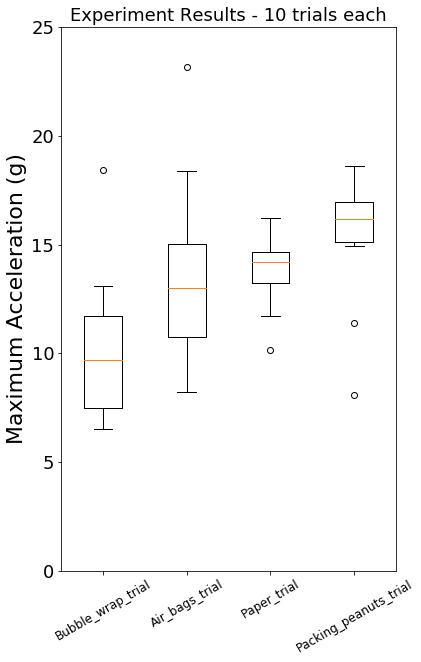

In [62]:
fig = plt.figure(constrained_layout=True)
fig, ax = plt.subplots(figsize=(6,10))
ax.boxplot(agg_data)
ax.set_ylim([0, 25])
ax.set_ylabel('Maximum Acceleration (g)')
ax.set_title('Experiment Results - 10 trials each')
xtickNames = plt.setp(ax, xticklabels=tests)
plt.setp(xtickNames, rotation=30, fontsize=12)
plt.savefig('./static/data/{}.png'.format('comparison_results'), dpi=150, bbox_inches='tight')
plt.show()

In [71]:
for data in agg_data:
    mean = np.median(data)
    print(mean)

9.703434004508624
12.984867730754189
14.178919778917606
16.193228425479433


Found 10 items with name Bubble_wrap_trial
Found 10 items with name Paper_trial
Found 10 items with name Packing_peanuts_trial
Found 10 items with name Air_bags_trial


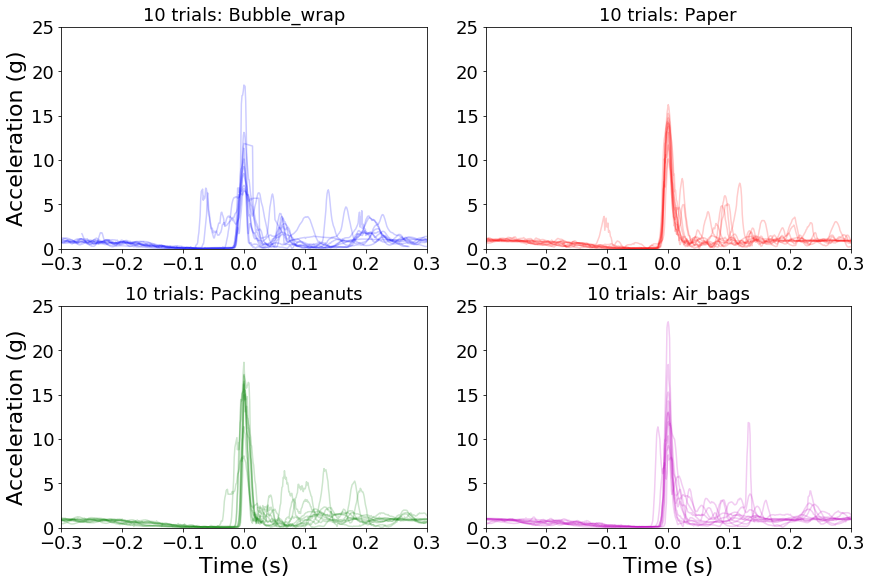

In [60]:
fig2 = plt.figure(constrained_layout=True, figsize=(12,8))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

tests = ['Bubble_wrap_trial', 'Paper_trial', 'Packing_peanuts_trial', 'Air_bags_trial']
ax = fig2.get_axes()
colors = ['b', 'r', 'g', 'm']
for i, test in enumerate(tests):
    ax_n = ax[i]
    all_data = gather_all_data(directory='./static/data', test=test)
    for data in all_data:
        ax_n.plot(data[0], data[1], color=colors[i], alpha=0.2)
        ax_n.set_ylim([0, 25])
        ax_n.set_xlim([-0.3, 0.3])
        ax_n.set_title('10 trials: {}'.format(test[:-6]))
        if i%2 == 0:
            ax_n.set_ylabel('Acceleration (g)')
        if i >= 2:
            ax_n.set_xlabel('Time (s)')
#         max_g.append(max(data[1]))
plt.savefig('./static/data/{}.png'.format('Individual_results_subplots'), dpi=150, bbox_inches='tight')
plt.show()

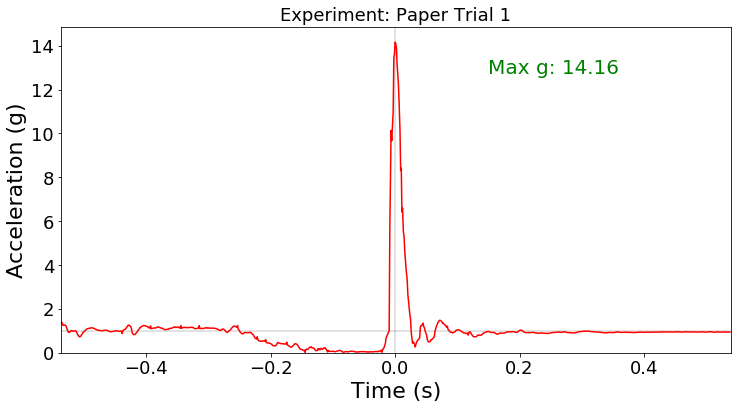

In [67]:
saveimage('Paper Trial 1', '2020_01_20-15_48_53_Paper_trial_1')